# Exploratory Data Analysis: Hands-On
Now it's your turn try some EDA techniques we covered in the walkthrough on your own. In the walkthough we explored daily air quality data from 2022. Can you apply similar techniques to process and explore data from a much larger dataset?

In the data folder there is a directory of annual daily data over the past decade.
```
project
├── data
│   └── raw
│       └── annual   <- Data is here
│
└── notebooks        <- Our working directory is here
```

#### Task 1: Combine the data files to a DataFrame
#### Task 2: Are there irregularities in the larger dataset that were not present in the 2022 dataset?
* Nulls? Duplicates?
* Additional parameters?
* Frequency of measurement?

#### Task 3: What new insights in particulate matter trends can we gain from the expanded dataset?
* Seasonality
* Improvement or degradation over the years?

#### *Extra Credit*
* How is this site doing when it comes to meeting [National Ambient Air Quality Standards](https://www.epa.gov/criteria-air-pollutants/naaqs-table)? (PM and Lead)
* Given the proximity of the site to the I95 highway and industrial sites, can we detect trends or periodicity in air pollutant concentrations? Do physical parameters like wind direction and speed have any influence?


In [1]:
# Imports
import pandas as pd  # Import pandas library as an alias of 'pd'
import matplotlib.pyplot as plt  # Import the sub-package pyplot from the matplotlib library as an alias of 'plt'
from pathlib import Path  # Import filesystem path package, for easier pathing to files and outputs
import os  # Library with operating system functions like listing directories

## Task 1: Combine the data files to a DataFrame

In [2]:
# This cell defines the function below. Then we can call and reuse it in future cells.

def combine_csv_files(path, prefix, suffix='.csv', **kwargs):
    """
    Searches a directory for text files, imports as pandas.DataFrames and
    concatenates to a single DataFrame.

    Args:
        path: pathlib.Path object of a directory
        prefix: String prefix to search for
        suffix: String suffix to search for, Optional, Default '.csv'
        **kwargs: Variable additional arguments pass to the pandas.read_csv function

    Returns: pandas.DataFrame

    """
    # List files in the directory
    list_files_in_path = sorted(os.listdir(path))

    # Initialize an empty list to store DataFrames
    list_df = []

    # Loop through files
    for file in list_files_in_path:
        # Check if the file starts with the prefix and ends with the suffix
        if file.startswith(prefix) and file.endswith(suffix):
            # Read in csv as DataFrame and append it to the list
            list_df.append(pd.read_csv(path / file, **kwargs))
        else:
            continue

    # Concatenate the DataFrames
    df_return = pd.concat(list_df).reset_index(drop=True)

    # Return the concatenated DataFrame
    return df_return

In [3]:
# File IO
# Path to data
data_path = Path('..', '..', 'data')
path_to_annual_data =  data_path / 'raw' / 'annual'

# Create a list of the columns we wish to keep
keep_cols = ['Parameter Code', 'POC', 'Parameter Name', 'Duration Description',
             'Pollutant Standard',
             'Date (Local)', 'Year', 'Day In Year (Local)', 'Units of Measure',
             'Exceptional Data Type',
             'Observation Count', 'Observation Percent', 'Arithmetic Mean', 'First Maximum Value',
             'First Maximum Hour', 'AQI', 'Daily Criteria Indicator', ]

# Use the function defined above
df_all_years = combine_csv_files(path_to_annual_data,
                            prefix='daily_44_007_0022_', # Read in files only starting with this prefix
                            suffix='.csv',  # Read in files only ending with this suffix
                            usecols=keep_cols,  # Specify columns to keep
                            parse_dates=['Date (Local)'], # Specify column to parse as a date instead of string
                            date_format='%Y-%m-%d', )  # Specify the format of date strings

print(df_all_years.shape)
df_all_years.tail()

(111624, 17)


,Parameter Code,POC,Parameter Name,Duration Description,Pollutant Standard,Date (Local),Year,Day In Year (Local),Units of Measure,Exceptional Data Type,Observation Count,Observation Percent,Arithmetic Mean,First Maximum Value,First Maximum Hour,AQI,Daily Criteria Indicator
111619,88101,3,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 Annual 2012,2023-12-31,2023,365,Micrograms/cubic meter (LC),NaN,1,100.0,1.200000,1.2,0,7,Y
111620,88101,3,PM2.5 - Local Conditions,1 HOUR,NaN,2023-12-31,2023,365,Micrograms/cubic meter (LC),NaN,24,100.0,1.250000,6.0,22,.,Y
111621,61107,1,Std Dev Vt Wind Direction,1 HOUR,NaN,2023-12-31,2023,365,Degrees Compass,NaN,24,100.0,25.333333,31.0,10,.,Y
111622,61104,1,Wind Direction - Resultant,1 HOUR,NaN,2023-12-31,2023,365,Degrees Compass,NaN,24,100.0,282.875000,301.0,10,.,Y
111623,62101,1,Outdoor Temperature,1 HOUR,NaN,2023-12-31,2023,365,Degrees Fahrenheit,NaN,24,100.0,36.541667,39.0,13,.,Y


In [4]:
# Renaming columns
# Assigning reformatted column names to the DataFrame's columns attribute
df_all_years.columns = (df_all_years.columns
                        .str.lower()  # Lowercase the names
                        .str.replace(' ', '_')  # Replace Spaces with underscores
                       )
df_all_years = df_all_years.rename(columns={'date_(local)': 'date',
                                  'day_in_year_(local)': 'day_in_year',
                                  }
                         )
df_all_years.columns                  

Index(['parameter_code', 'poc', 'parameter_name', 'duration_description',
       'pollutant_standard', 'date', 'year', 'day_in_year', 'units_of_measure',
       'exceptional_data_type', 'observation_count', 'observation_percent',
       'arithmetic_mean', 'first_maximum_value', 'first_maximum_hour', 'aqi',
       'daily_criteria_indicator'],
      dtype='object')

## Task 2: Are there irregularities in the larger dataset that were not present in the 2022 dataset?
* Nulls? Duplicates?
* Additional parameters?
* Frequency of measurement?

In [5]:
df_all_years.isna().sum()

parameter_code                   0
poc                              0
parameter_name                   0
duration_description             0
pollutant_standard           98104
date                             0
year                             0
day_in_year                      0
units_of_measure                 0
exceptional_data_type       111435
observation_count                0
observation_percent              0
arithmetic_mean                  0
first_maximum_value              0
first_maximum_hour               0
aqi                              0
daily_criteria_indicator         0
dtype: int64

In [6]:
df_all_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111624 entries, 0 to 111623
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   parameter_code            111624 non-null  int64         
 1   poc                       111624 non-null  int64         
 2   parameter_name            111624 non-null  object        
 3   duration_description      111624 non-null  object        
 4   pollutant_standard        13520 non-null   object        
 5   date                      111624 non-null  datetime64[ns]
 6   year                      111624 non-null  int64         
 7   day_in_year               111624 non-null  int64         
 8   units_of_measure          111624 non-null  object        
 9   exceptional_data_type     189 non-null     object        
 10  observation_count         111624 non-null  int64         
 11  observation_percent       111624 non-null  float64       
 12  ar

In [7]:
# Are there additional parameters measured outside of 2022?

# Create a mask for 2022
m_2022 = df_all_years['date'].dt.year == 2022
# Get list of parameters measure in 2022 and in all other years 
params_2022 = df_all_years.loc[m_2022, 'parameter_name'].unique()
params_not2022 = df_all_years.loc[~m_2022, 'parameter_name'].unique()  # Converse of the mask 
print(f"Number of parameters in 2022: {len(params_2022)}\n" \
      f"Number of parameters out of 2022: {len(params_not2022)}")

Number of parameters in 2022: 92
Number of parameters out of 2022: 140


In [8]:
# Find out the names of the parameters that weren't measured in 2022 
print("List of parameters not measured in 2022\n---------------------------------------")
for param in params_not2022:
    if param not in params_2022:
        print(param)

List of parameters not measured in 2022
---------------------------------------
Cyclopenta[cd]pyrene (TSP) STP
PM2.5 Raw Data
9-fluorenone (TSP) STP
Retene (TSP) STP
Chromium VI (TSP) STP
2-Methylheptane
Isopropylbenzene
2,3-Dimethylbutane
1-Butene
3-Methylhexane
2,3,4-Trimethylpentane
3-Methylheptane
Isoprene
2,2-Dimethylbutane
2,4-Dimethylpentane
n-Nonane
n-Decane
Cyclopentane
cis-2-Pentene
3-Methylpentane
Isopentane
1-Pentene
trans-2-Pentene
Isobutane
trans-2-Butene
cis-2-Butene
Ethylene
Propane
Propylene
Acetylene
Sum of PAMS target compounds
Total NMOC (non-methane organic compound)
Ethane
Ethyl acetate
1,2,3-Trimethylbenzene
m-Ethyltoluene
p-Ethyltoluene
m-Diethylbenzene
p-Diethylbenzene
n-Propylbenzene
o-Ethyltoluene
2-Methylpentane
2,3-Dimethylpentane
n-Undecane
Methylcyclohexane
Methylcyclopentane
2-Methylhexane
Chloroprene


In [9]:
# Measurement frequency by year
gb_year = df_all_years.groupby(by=[df_all_years['date'].dt.year, 'parameter_name'])
df_year_param_counts = gb_year['arithmetic_mean'].count()
df_year_param_counts

date  parameter_name            
2012  1,1,2,2-Tetrachloroethane     56
      1,1-Dichloroethane            56
      1,1-Dichloroethylene          56
      1,2,3-Trimethylbenzene        56
      1,2,4-Trimethylbenzene        56
                                    ..
2023  n-Octane                      58
      n-Pentane                     58
      o-Xylene                      58
      trans-1,2-Dichloroethylene    58
      trans-1,3-Dichloropropene     58
Name: arithmetic_mean, Length: 1267, dtype: int64

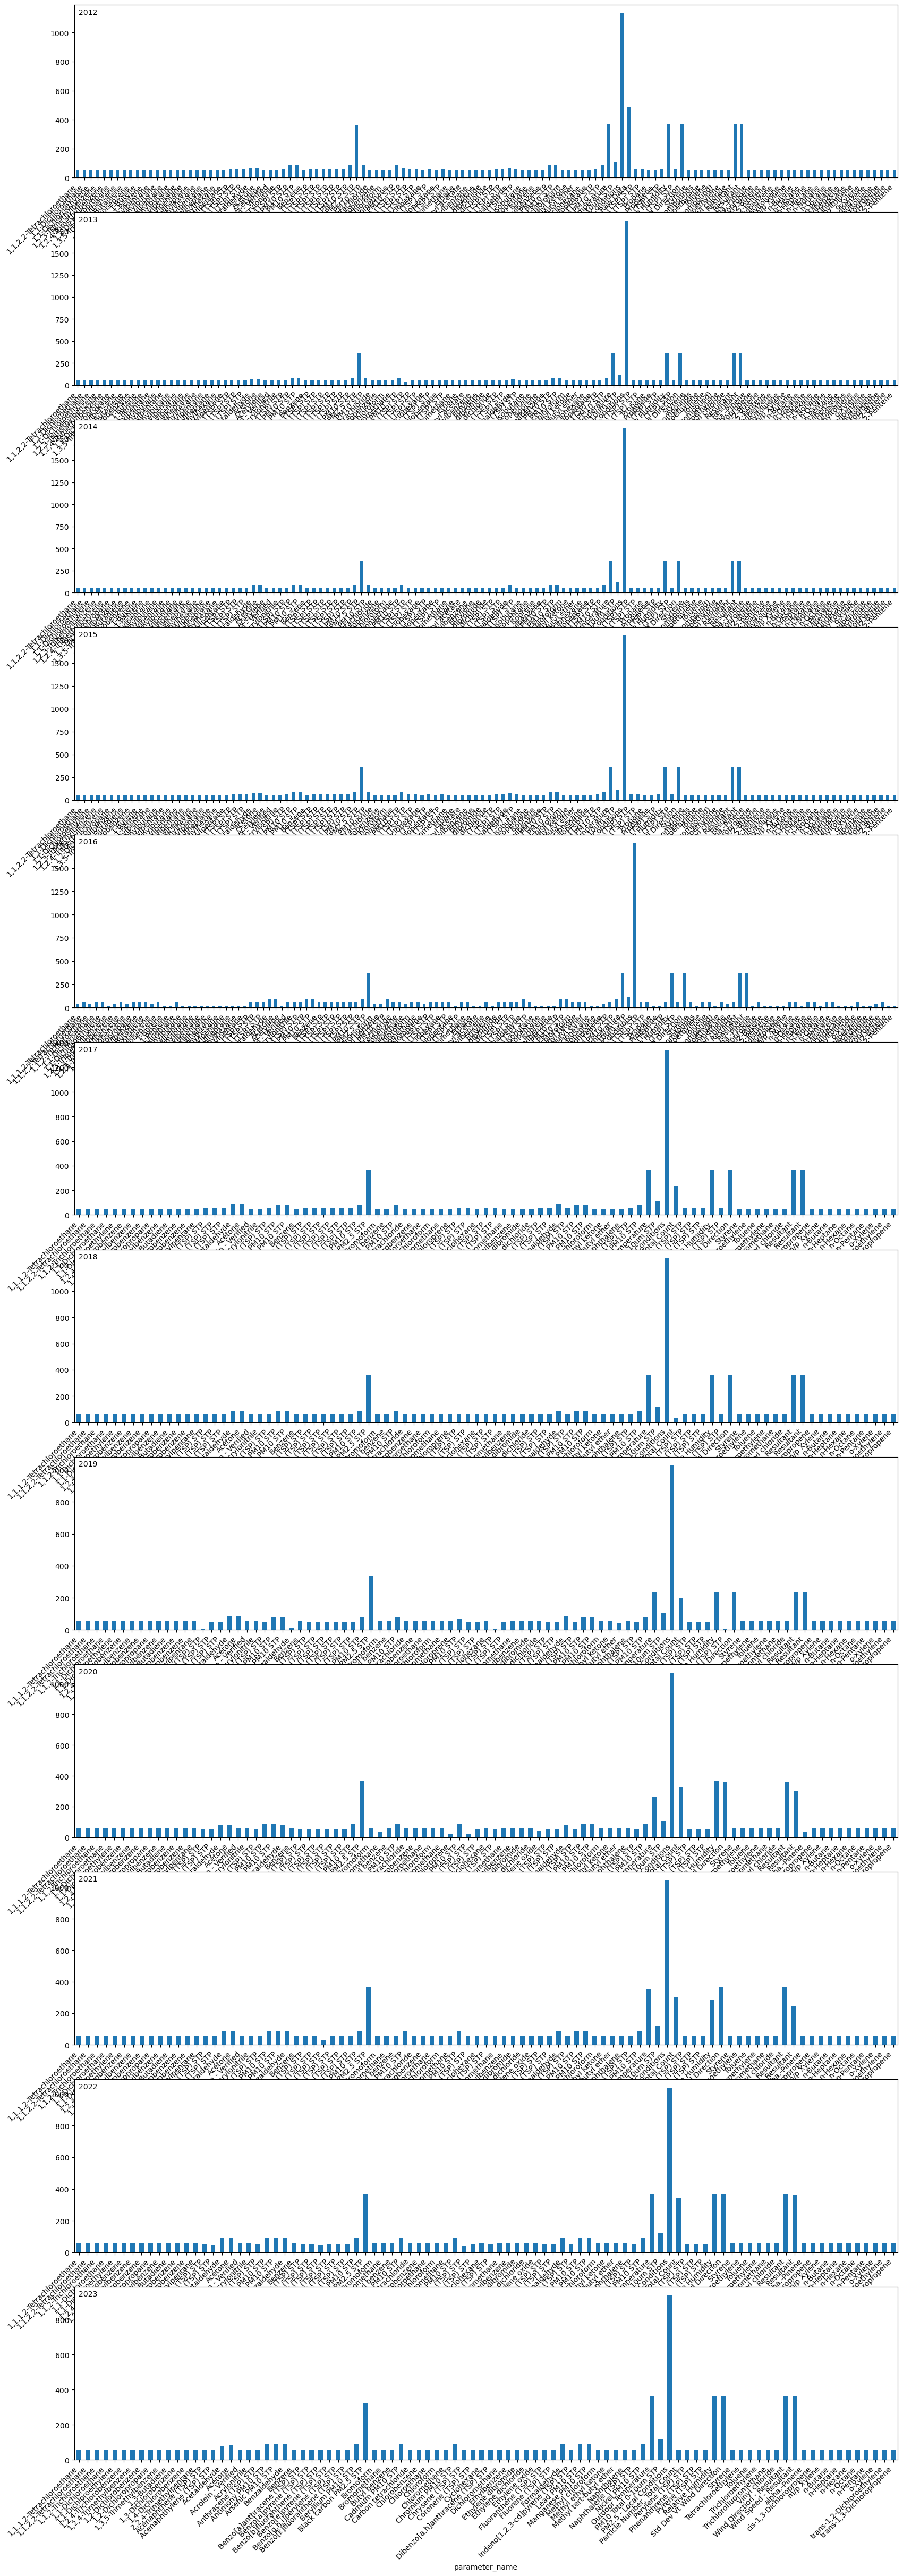

In [10]:
years = range(2012, 2024)

fig, axs = plt.subplots(nrows=len(years), ncols=1, figsize=(20,60))
for ax, year in zip(axs, years):
    df_year_param_counts[year].plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
    ax.text(.005, .98, year, ha="left", va="top", transform=ax.transAxes)

## Task 3: What new insights in particulate matter trends can we gain from the expanded dataset?
* Seasonality
* Improvement or degradation over the years?

In [11]:
df_param_classes = pd.read_csv(data_path / 'raw' / 'params_class.csv')
df_all_years_merged = df_all_years.merge(df_param_classes, on='parameter_code', how='left')
df_particulate = df_all_years_merged.query("param_class == 'particulate'").reset_index()
df_particulate.head()

,index,parameter_code,poc,parameter_name_x,duration_description,pollutant_standard,date,year,day_in_year,units_of_measure,...,observation_count,observation_percent,arithmetic_mean,first_maximum_value,first_maximum_hour,aqi,daily_criteria_indicator,parameter_name_y,param_class,tier1
0,4,88101,1,PM2.5 - Local Conditions,24 HOUR,PM25 Annual 2012,2012-01-01,2012,1,Micrograms/cubic meter (LC),...,1,100.0,8.700000,8.70,0,36,Y,PM2.5 - Local Conditions,particulate,False
1,5,88101,1,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,2012-01-01,2012,1,Micrograms/cubic meter (LC),...,1,100.0,8.700000,8.70,0,36,Y,PM2.5 - Local Conditions,particulate,False
2,29,84313,1,Black carbon PM2.5 STP,1 HOUR,NaN,2012-01-01,2012,1,Micrograms/cubic meter (25 C),...,24,100.0,0.461250,1.05,8,.,Y,Black carbon PM2.5 STP,particulate,False
3,33,88101,1,PM2.5 - Local Conditions,24 HOUR,PM25 Annual 2012,2012-01-02,2012,2,Micrograms/cubic meter (LC),...,1,100.0,3.000000,3.00,0,13,Y,PM2.5 - Local Conditions,particulate,False
4,40,84313,1,Black carbon PM2.5 STP,1 HOUR,NaN,2012-01-02,2012,2,Micrograms/cubic meter (25 C),...,24,100.0,0.194167,0.35,22,.,Y,Black carbon PM2.5 STP,particulate,False


## *Extra Credit*
* How is this site doing when it comes to meeting [National Ambient Air Quality Standards](https://www.epa.gov/criteria-air-pollutants/naaqs-table)? (PM and Lead)
* Given the proximity of the site to the I95 highway and industrial sites, can we detect trends or periodicity in air pollutant concentrations? Do physical parameters like wind direction and speed have any influence?